In [1]:
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))

In [31]:
pd= fread('../data//2021-03-09_round4v2_74_biosets_wZero_Time_point.txt') 
pd %>% dim
pd %>% head(1)
pd %>% colnames %>% head(50)

[1]    89 10587

Bioset ID of SARS CoV-Round3BV2_74 Biosets_wZero Time Point.jmp,Day Post-Infection,Species,"GEO ID, link",Study name,Bioset name,Test Samples,Control Samples,Feature Size,Article PubMed ID,⋯,Zswim5,Zswim6,Zswim8,Zufsp,Zwilch,Zwint,Zxda,Zxdc,Zyg11b,Zzz3
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
867451,0.5,Mus musculus,GSE36969,Lungs from aged and young mice infected with mouse adapted SARS strains (Timecourse),Lungs from 1yr old (aged) mice - 12hr post SARS MA15 strain infection _vs_ mock (PBS) infection,3,3,627,19420084,⋯,0,0,-61.05975,0,0,0,0,0,0,0


[1] "Bioset ID of SARS CoV-Round3BV2_74 Biosets_wZero Time Point.jmp"
 [2] "Day Post-Infection"                                             
 [3] "Species"                                                        
 [4] "GEO ID, link"                                                   
 [5] "Study name"                                                     
 [6] "Bioset name"                                                    
 [7] "Test Samples"                                                   
 [8] "Control Samples"                                                
 [9] "Feature Size"                                                   
[10] "Article PubMed ID"                                              
[11] "Viral Strain"                                                   
[12] "SARS-CoV Strain"                                                
[13] "Viral Dose"                                                     
[14] "Viral Dose (PFUs)"                                              
[15] "Viral Severity"                                                 
[16] "Sample Source (strain, cell)"                                   
[17] "Host Mouse Strain"                                              
[18] "Sex"                                                            
[19] "Host Age Category"                                              
[20] "Host Age Cat"                                                   
[21] "Host Age"                                                       
[22] "Technology"                                                     
[23] "Lab"                                                            
[24] "March1"                                                         
[25] "43891"                                                          
[26] "43892"                                                          
[27] "March2"                                                         
[28] "March3"                                                         
[29] "March5"                                                         
[30] "March6"                                                         
[31] "44075"                                                          
[32] "Sept2"                                                          
[33] "Sept3"                                                          
[34] "44077"                                                          
[35] "Sept4"                                                          
[36] "44078"                                                          
[37] "Sept5"                                                          
[38] "Sept6"                                                          
[39] "44080"                                                          
[40] "Sept7"                                                          
[41] "Sept8"                                                          
[42] "44082"                                                          
[43] "44083"                                                          
[44] "Sept11"                                                         
[45] "44086"                                                          
[46] "212970"                                                         
[47] "228712"                                                         
[48] "329302"                                                         
[49] "385414"                                                         
[50] "432575"

In [28]:
pd %>% filter(`Day Post-Infection` == 0) %>% head

Bioset ID of SARS CoV-Round3BV2_74 Biosets_wZero Time Point.jmp,Day Post-Infection,Species,"GEO ID, link",Study name,Bioset name,Test Samples,Control Samples,Feature Size,Article PubMed ID,⋯,Zswim5,Zswim6,Zswim8,Zufsp,Zwilch,Zwint,Zxda,Zxdc,Zyg11b,Zzz3
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,0,,,,,0,0,0,,⋯,0,0,0,0,0,0,0,0,0,0
NA,0,,,,,0,0,0,,⋯,0,0,0,0,0,0,0,0,0,0
NA,0,,,,,0,0,0,,⋯,0,0,0,0,0,0,0,0,0,0
NA,0,,,,,0,0,0,,⋯,0,0,0,0,0,0,0,0,0,0
NA,0,,,,,0,0,0,,⋯,0,0,0,0,0,0,0,0,0,0
NA,0,,,,,0,0,0,,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
(pd.data = pd[, 28:(ncol(pd))]) %>% dim
pd.data %>% flatten %>% unlist %>% quantile(.,probs = c(0,0.05,.25,.5,.75,.95,1)) %>% t


[1]    89 10560

0%,5%,25%,50%,75%,95%,100%
-99.89212,-26.2773,0,0,0,36.85242,99.9001


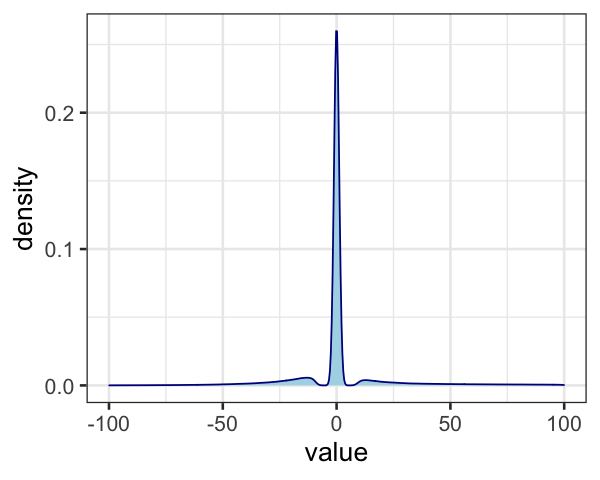

In [11]:
options(repr.plot.width = 5, repr.plot.height = 4)
data.frame(value = pd.data %>% flatten %>% unlist) %>% ggplot(., aes(value)) + geom_density(color = "darkblue", 
    fill = "lightblue") + theme_bw(base_size = 16)

In [ ]:
pd[,1:100] %>%dim
fwrite(pd[,1:100],'sub.csv')
system('open sub.csv')

In [12]:
pd$Species %>% table
pd$`Day Post-Infection` %>% table

.
             Mus musculus 
          15           74 

.
  0 0.5   1   2   4   7 
 15   6  15  19  19  15 

In [33]:
pd[, c(1:2, 28:31)] %>% unite("Time_BiosetID", c(2, 1), sep = "_") %>% head(1)
pd[, c(1:2, 28)] %>% unite("Time_BiosetID", c(2, 1), sep = "_") %>% pull(Time_BiosetID) %>% 
    table


Time_BiosetID,March3,March5,March6,44075
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.5_867451,0,0,0,0


.
      0_NA 0.5_867451 0.5_867454 0.5_867457 0.5_867478 0.5_867481 0.5_867484 
        15          1          1          1          1          1          1 
  1_494014   1_494017   1_494020   1_494023   1_821644   1_823390   1_839425 
         1          1          1          1          1          1          1 
  1_839437   1_867460   1_867463   1_867466   1_867487   1_867490   1_867493 
         1          1          1          1          1          1          1 
  1_926614  2_1326109   2_494026   2_494029   2_494032   2_494035   2_821650 
         1          1          1          1          1          1          1 
  2_823396   2_833449   2_839428   2_839440   2_867469   2_867472   2_867475 
         1          1          1          1          1          1          1 
  2_867496   2_867499   2_867502   2_926620   2_957616   2_995281   4_494038 
         1          1          1          1          1          1          1 
  4_494041   4_494044   4_494047   4_685187   4_685193   4_685

In [71]:
pd[, c(1:2, 28:30)] %>% unite("Time_BiosetID", c(2, 1), sep = "_") %>% filter(!Time_BiosetID %>% 
    grepl("NA", .)) %>% head
pd.data <- pd %>% select(c(1:2, 28:(ncol(pd)))) %>% unite("Time_BiosetID", c(2, 1), 
    sep = "_") %>% filter(!Time_BiosetID %>% grepl("NA", .)) %>% t %>% as.data.frame

Time_BiosetID,March3,March5,March6
<chr>,<dbl>,<dbl>,<dbl>
0.5_867451,0,0,0
0.5_867454,0,0,0
0.5_867457,0,0,0
0.5_867478,0,0,0
0.5_867481,0,0,0
0.5_867484,0,0,0


In [72]:
colnames(pd.data) <- pd.data["Time_BiosetID", ] %>% as.vector
pd.data <- pd.data[2:nrow(pd.data), ]
pd.data %>% head
pd.data %>% dim

,0.5_867451,0.5_867454,0.5_867457,0.5_867478,0.5_867481,0.5_867484,1_926614,1_494014,1_494017,1_494020,⋯,7_685178,7_685217,7_821662,7_823408,7_839434,7_839446,7_833455,7_840319,7_834112,7_995287
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
March3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.717376,21.139951,25.225516,13.911069,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
March5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,43.71738,0.00000,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
March6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.345392,19.622464,13.911069,⋯,-12.210131,-11.108075,12.417918,-16.572974,0.000000,10.816353,-15.346226,0.000000,-13.180961,-13.735811
44075,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,50.10020,50.18166,11.47676,24.22962,57.71340,29.36616,0.00000,53.20677,39.04054,71.68664
Sept2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-49.59088,-50.70325,-24.04725,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Sept3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


[1] 10560    74

In [73]:
pd.data %>% distinct %>% dim

[1] 9883   74

In [76]:
fwrite(pd.data,'plot_dat.csv')

In [85]:
install.packages("devtools")
install_github("jokergoo/ComplexHeatmap")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  internet routines cannot be loaded”
Warning message:
“package ‘devtools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in install_github("jokergoo/ComplexHeatmap"): could not find function "install_github"


In [80]:
ComplexHeHeatmap(pd.data, row_km = 3)

ERROR: Error in Heatmap(pd.data, row_km = 3): could not find function "Heatmap"
